In [1]:
!pip install alpha_vantage

  Created wheel for alpha-vantage: filename=alpha_vantage-2.1.0-cp36-none-any.whl size=14345 sha256=6aa202aa9dda84af51675298b9357eac1ab02f07d1e5d7abc7749c5a61caedb7
  Stored in directory: /root/.cache/pip/wheels/21/9c/02/b7cfae63f7119f4089f229ba1a09ce90fabbaf96199c2890be
Successfully built alpha-vantage


In [52]:
!pip install pandas_profiling

We use alpha_vantage here as our data API, the  detailed way of using is can be seen in the website.

In [0]:
MY_API_KEY = 'J4PS1W9LI8IL0E97'
as_of_today = '2019-08-14'
from alpha_vantage.timeseries import TimeSeries
from datetime import datetime

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.style.use('ggplot')
import os

In [4]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
ts = TimeSeries(key='MY_API_KEY', output_format='pandas');
## AGG : ishare Core US aggregate Bond ETF
data1, meta_data1 = ts.get_daily(symbol='AGG', outputsize='full');
data1 = data1['4. close'];
## SPY : S&P 500 ETF
data2, meta_data2 = ts.get_daily(symbol='SPY', outputsize='full');
data2 = data2['4. close'];
## OIL : Crude oil ETF
data3, meta_data3 = ts.get_daily(symbol='OIL', outputsize='full');
data3 = data3['4. close'];
## QQQ : NASDAQ ETF
data4, meta_data4 = ts.get_daily(symbol='QQQ', outputsize='full');
data4 = data4['4. close'];
## GLD : Gold ETF
data5, meta_data5 = ts.get_daily(symbol='GLD', outputsize='full');
data5 = data5['4. close'];
data1 = pd.DataFrame(data1);
data1.columns = ['AGG']
data2 = pd.DataFrame(data2);
data2.columns = ['SPY']
data3 = pd.DataFrame(data3);
data3.columns = ['OIL']
data4 = pd.DataFrame(data4);
data4.columns = ['QQQ']
data5 = pd.DataFrame(data5);
data5.columns = ['GLD']
data1.index = pd.to_datetime(data1.index)
data2.index = pd.to_datetime(data2.index)
data3.index = pd.to_datetime(data3.index)
data4.index = pd.to_datetime(data4.index)
data5.index = pd.to_datetime(data5.index)

mg1 = pd.merge(left = data1, left_index=True, right= data2, right_index= True, how='inner')
mg2 = pd.merge(left = mg1, left_index=True, right= data3, right_index= True, how='inner')
mg3 = pd.merge(left = mg2, left_index=True, right= data4, right_index= True, how='inner')
dataall = pd.merge(left = mg3, left_index=True, right= data5, right_index= True, how='inner')

KeyError: ignored

In [0]:
dataall

In [0]:
os.chdir("/content/drive/My Drive/summer_lecture/")

Plot historical performance

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


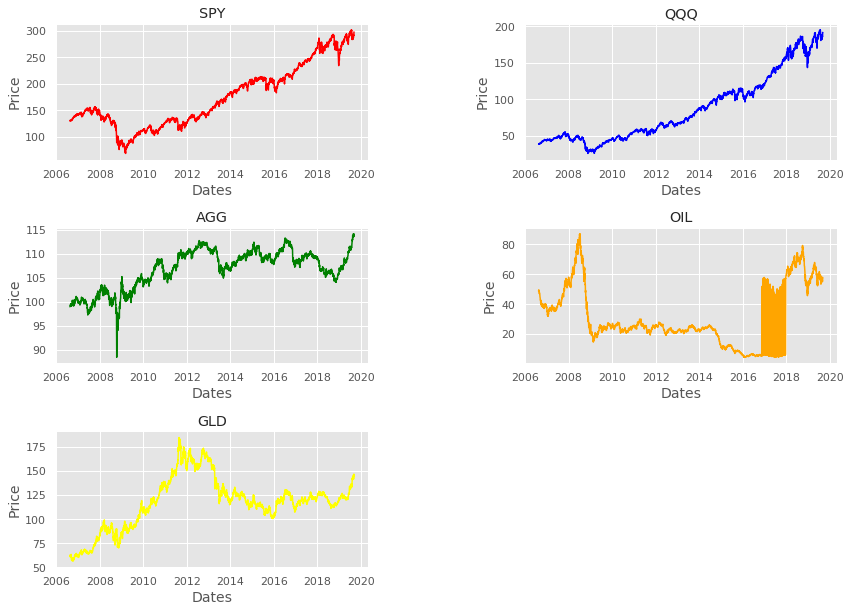

In [8]:
fig1 =plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=.5,wspace=.5) # it adds space in between plots
plt.subplot(323)
ax = plt.gca()
ax.plot(dataall['AGG'], color = 'green')
ax.set_xlabel('Dates',fontsize=14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('AGG')

plt.subplot(321)
ax = plt.gca()
ax.plot(dataall['SPY'], color = 'red')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('SPY')

plt.subplot(322)
ax = plt.gca()
ax.plot(dataall['QQQ'], color ='blue')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('QQQ')

plt.subplot(324)
ax = plt.gca()
ax.plot(dataall['OIL'], color='orange')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('OIL')

plt.subplot(325)
ax = plt.gca()
ax.plot(dataall['GLD'], color ='yellow')
ax.set_xlabel('Dates',fontsize =14)
ax.set_ylabel('Price',fontsize =14)
ax.set_title('GLD')

plt.show();

# https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python
# plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
# Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax.
# Having fig is useful if you want to change figure-level attributes or save the figure as an image file later (e.g. with fig.savefig('yourfilename.png')). 
# You certainly don't have to use the returned figure object but many people do use it later so it's common to see. 
# Also, all axes objects (the objects that have plotting methods), have a parent figure object anyway, thus:

# fig, ax = plt.subplots()

# is more concise than this:

# fig = plt.figure()
# ax = fig.add_subplot(111)

Since it is hard to compare the relative performance of each asset, we need to calculate the total return at time T from time 0 as :

$[\frac{P_{T}^{1}}{P_{0}^{1}},\frac{P_{T}^{2}}{P_{0}^{2}},\frac{P_{T}^{3}}{P_{0}^{3}},\frac{P_{T}^{4}}{P_{0}^{4}},\frac{P_{T}^{5}}{P_{0}^{5}}]$

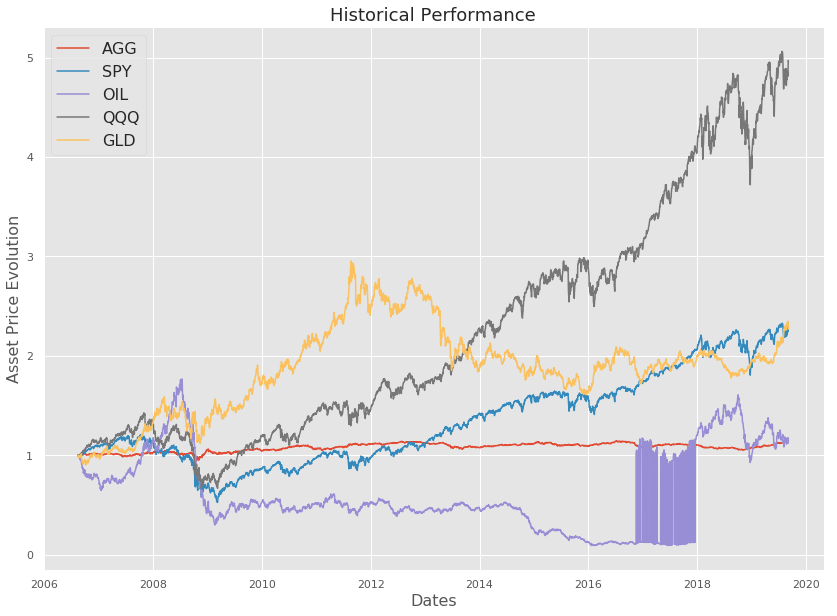

In [11]:
normalized_series = (dataall/dataall.iloc[0])
fig2 =plt.figure(figsize=(14,10))
plt.plot(normalized_series)

title_text_obj = plt.title("Historical Performance", fontsize = 18)

xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
#('AGG','SPY','QQQ','OIL','GLD')
plt.legend(('AGG','SPY','OIL','QQQ','GLD'),fontsize = 16,loc = 'upper left')
plt.show()

The simplest & fastest way to calculate the return is by using built-in numpy/pandas methods:

In [12]:
dataall_returns = np.log(dataall/dataall.shift(1))
dataall_returns2 = dataall.pct_change()
dataall_returns.dropna(inplace=True)
dataall_returns

,AGG,SPY,OIL,QQQ,GLD
date,,,,,
2006-08-17,0.000202,0.001847,-0.017017,0.003880,-0.023641
2006-08-18,0.000707,0.005063,0.001653,0.001548,0.000164
2006-08-21,0.002421,-0.004294,0.018004,-0.009584,0.022677
2006-08-22,-0.000504,-0.000077,-0.001826,0.000260,-0.006266
2006-08-23,0.000302,-0.002771,-0.018451,-0.007575,-0.003552
2006-08-24,-0.000101,-0.000848,0.011725,0.002880,-0.001295
2006-08-25,0.001007,0.001233,-0.001228,0.001828,0.000324
2006-08-28,-0.000907,0.004765,-0.028241,0.007539,-0.012544
2006-08-29,0.000403,0.001149,-0.010374,0.003103,-0.000984


In [0]:
stats = pd.DataFrame()
stats['Daily Returns(%)'] =dataall_returns.mean() *100
stats['Daily Volatility(%)'] = dataall_returns.std() * 100
stats['Sharpe Ratio'] = stats['Daily Returns(%)'] /stats['Daily Volatility(%)']

In [14]:
print('Assets Daily Statistics - full observation period')
stats.style.bar(color=['red','green'], align='zero')

Assets Daily Statistics - full observation period


,Daily Returns(%),Daily Volatility(%),Sharpe Ratio
AGG,0.0042297,0.310623,0.0136168
SPY,0.0252996,1.21329,0.020852
OIL,0.00487705,44.037,0.000110749
QQQ,0.0487713,1.30405,0.0373999
GLD,0.0249622,1.14667,0.0217692


  $Skewness = E\left[\left(\frac{X -\mu}{\sigma}\right)^3\right]$
  
  $Kurtosis = E\left[\left(\frac{X -\mu}{\sigma}\right)^4\right]$

Measurement of asset return distribution: mean, variance(volatility), skewness, kurtosis, etc

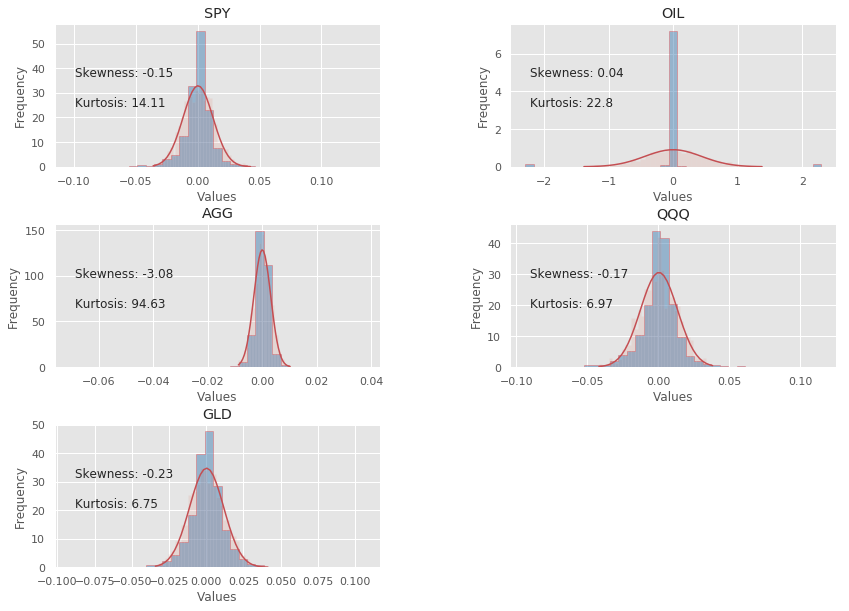

In [15]:
binsnumber = 35

fig3, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots

asset_plot_location = {'AGG':323, 'SPY': 321 , 'OIL': 322, 'QQQ': 324, 'GLD': 325}
asset_list = ['AGG', 'SPY', 'OIL', 'QQQ', 'GLD']

####
def return_distribution_plot(name):
    """
    Plot function
    """
    fig3, ax = plt.subplots(figsize=(14,10))
    plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
    plt.subplot(asset_plot_location.get(name))
    ax = plt.gca()

    ax.hist(dataall_returns[name], bins=binsnumber, color='steelblue', density = True,
           alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

    sigma, mu = dataall_returns[name].std(),dataall_returns[name].mean() # mean and standard deviation
    s = np.random.normal(mu, sigma, 1000)
    count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
    ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

    ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns[name].skew(),2),round(dataall_returns[name].kurtosis(),2)),
                 xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
    ax.set_title(name)
    plt.show()
    
#####################
plt.subplot(323)
ax = plt.gca()

ax.hist(dataall_returns['AGG'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = dataall_returns['AGG'].std(),dataall_returns['AGG'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns['AGG'].skew(),2),round(dataall_returns['AGG'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('AGG')

#########################
plt.subplot(321)
ax1 = plt.gca()
ax1.hist(dataall_returns['SPY'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = dataall_returns['SPY'].std(),dataall_returns['SPY'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns['SPY'].skew(),2),round(dataall_returns['SPY'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('SPY')


########################
plt.subplot(322)
ax = plt.gca()
ax.hist(dataall_returns['OIL'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = dataall_returns['OIL'].std(),dataall_returns['OIL'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns['OIL'].skew(),2),round(dataall_returns['OIL'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('OIL')



########################
plt.subplot(324)
ax = plt.gca()
ax.hist(dataall_returns['QQQ'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = dataall_returns['QQQ'].std(),dataall_returns['QQQ'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns['QQQ'].skew(),2),round(dataall_returns['QQQ'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('QQQ')


########################
plt.subplot(325)
ax = plt.gca()
ax.hist(dataall_returns['GLD'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = dataall_returns['GLD'].std(),dataall_returns['GLD'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(dataall_returns['GLD'].skew(),2),round(dataall_returns['GLD'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('GLD')

plt.show();
# fig3.savefig('histos.png',dpi=fig3.dpi)

In [0]:
# for i in range(len(asset_list)):
#     return_distribution_plot(asset_list[i])

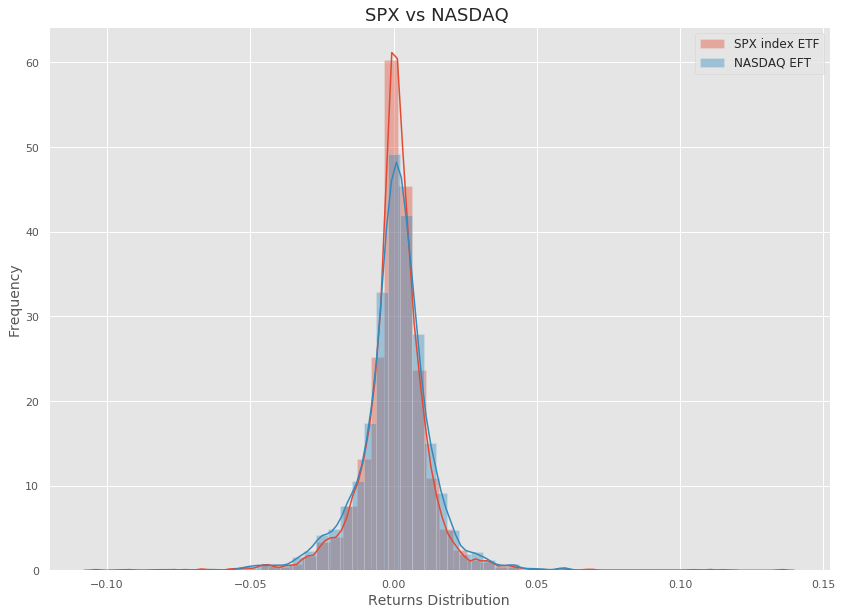

In [19]:
fig4 = plt.figure(figsize=(14,10))

sns.distplot(dataall_returns['SPY'])
sns.distplot(dataall_returns['QQQ'])

# sns.distplot:
# Flexibly plot a univariate distribution of observations.
# This function combines the matplotlib ``hist`` function (with automatic
# calculation of a good default bin size) with the seaborn :func:`kdeplot`
# and :func:`rugplot` functions. It can also fit ``scipy.stats``
# distributions and plot the estimated PDF over the data.

plt.legend(('SPX index ETF','NASDAQ EFT'),fontsize = 12)
plt.title('SPX vs NASDAQ ',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();


In [20]:
asset_list

['AGG', 'SPY', 'OIL', 'QQQ', 'GLD']

Let us analyze the risk profile of each portfolio to compare performance

Portfolio return:

$\mbox{Portfolio weighted return} = \begin{bmatrix}
       r_1 & r_2 & r_3 & r_4 & r_5 
     \end{bmatrix} 
     \times 
     \begin{bmatrix}
       w_1 \\
       w_2 \\
       w_3 \\
       w_4 \\
       r_5 
     \end{bmatrix} 
     $
     
   $\mbox{Portfolio Volatility} = \begin{bmatrix}
       w_1 & w_2 & w_3 & w_4 & w_5 
     \end{bmatrix} 
     \times
     \begin{bmatrix}
       \sigma_{11}&\sigma_{12}&\sigma_{13}&\sigma_{14}&\sigma_{15}\\
       \sigma_{21}&\sigma_{22}&\sigma_{23}&\sigma_{24}&\sigma_{25}\\
       \sigma_{31}&\sigma_{32}&\sigma_{33}&\sigma_{34}&\sigma_{35}\\
       \sigma_{41}&\sigma_{42}&\sigma_{43}&\sigma_{44}&\sigma_{45}\\
       \sigma_{51}&\sigma_{52}&\sigma_{53}&\sigma_{54}&\sigma_{55}
     \end{bmatrix}
     \times
   \begin{bmatrix}
       w_1 \\
       w_2 \\
       w_3 \\
       w_4 \\
       w_5 
     \end{bmatrix}   
     $

In [21]:
allocation = pd.DataFrame(data =[[.0,.20],[.6,.20],[.0,.20],[.4,.20],[.0,.20]],
                          index=asset_list,
                         columns =['Equity Only','Cross Asset'])
allocation

,Equity Only,Cross Asset
AGG,0.0,0.2
SPY,0.6,0.2
OIL,0.0,0.2
QQQ,0.4,0.2
GLD,0.0,0.2


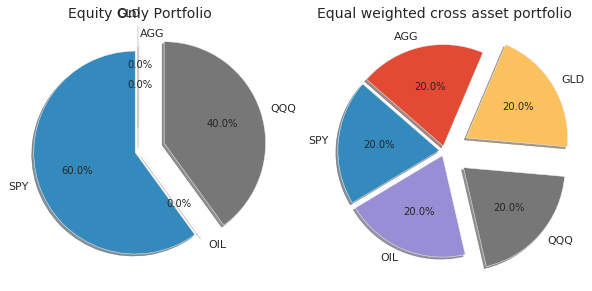

In [24]:
fig5 =plt.figure(figsize=(10,8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
explode = [.05,.05,.05,.25,.25]

labels = ['AGG', 'SPY', 'OIL', 'QQQ', 'GLD']

plt.subplot(121)
plt.pie(allocation['Equity Only'], explode = explode, labels= labels,
       autopct= '%1.1f%%', startangle = 90,shadow=True)
plt.title('Equity Only Portfolio',fontsize =14)

plt.subplot(122)
plt.pie(allocation['Cross Asset'], explode = explode, labels= labels,
       autopct= '%1.1f%%', startangle = 67, shadow= True)
plt.title('Equal weighted cross asset portfolio',fontsize =14)

plt.show();


In [0]:
normalized_series1 = normalized_series.copy()
## Q: mul
normalized_series1['Equity Only'] = normalized_series[['AGG', 'SPY', 'OIL', 'QQQ', 'GLD']].mul(allocation['Equity Only'].values,axis=1).sum(axis=1)
normalized_series1['Cross Asset'] = normalized_series.mul(allocation['Cross Asset'].values,axis=1).sum(axis=1)

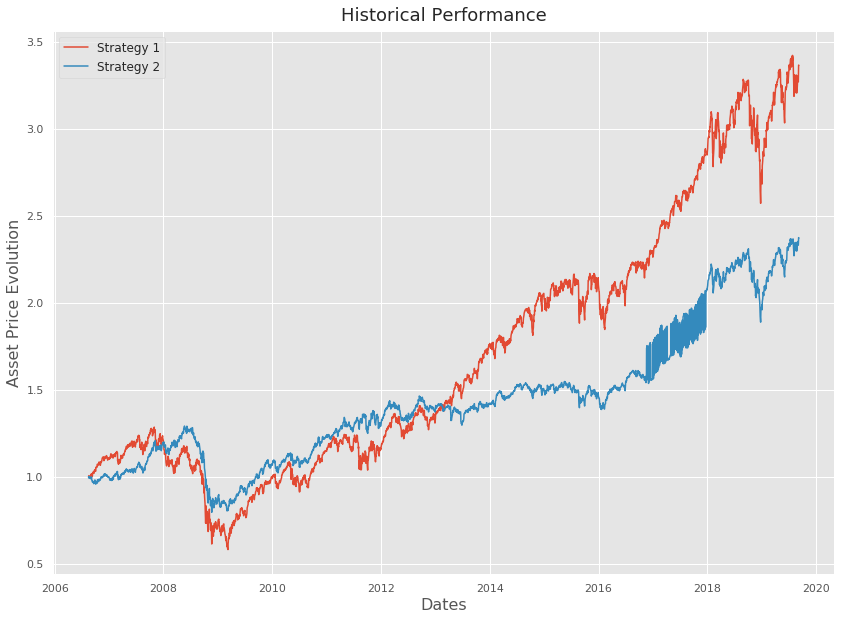

In [26]:
fig6 =plt.figure(figsize=(14,10))
ax = plt.gca()
# Get the current Axes instance on the current figure matching the given keyword args, or create one.

ax.plot(normalized_series1[['Equity Only','Cross Asset']])

title_text_obj = plt.title("Historical Performance", fontsize = 18,
                          verticalalignment = 'bottom')

xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
#('AGG','SPY','QQQ','EMB','GLD')
ax.legend(('Strategy 1', 'Strategy 2'),fontsize = 12)
# ax.annotate('Strategy 2',('2018-04-30',1.4),xycoords = 'data',xytext =('2013-08-30',1.4),arrowprops =dict(arrowstyle ='->'),fontsize=14)
plt.show()
# fig6.savefig('portfolioscomp.png',dpi=fig6.dpi)

In [30]:
dataall_returns.corr('pearson')
# https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

,AGG,SPY,OIL,QQQ,GLD
AGG,1.000000,-0.130856,-0.004534,-0.134746,0.163337
SPY,-0.130856,1.000000,0.026261,0.916593,0.019286
OIL,-0.004534,0.026261,1.000000,0.023780,0.022950
QQQ,-0.134746,0.916593,0.023780,1.000000,-0.007536
GLD,0.163337,0.019286,0.022950,-0.007536,1.000000


In [31]:
allocation.columns

Index(['Equity Only', 'Cross Asset'], dtype='object')

In [0]:
Expected_Return_EQOnly = np.sum(dataall_returns.mean()* allocation["Equity Only"])
Expected_Std_EQOnly = np.sqrt(np.dot(allocation["Equity Only"].T, np.dot(dataall_returns.cov(), allocation["Equity Only"])))

In [0]:
Expected_Return_CrossAsset = np.sum(dataall_returns.mean() * allocation["Cross Asset"])
Expected_Std_CrossAsset = np.sqrt(np.dot(allocation["Cross Asset"].T,np.dot(dataall_returns.cov(),
                                                             allocation["Cross Asset"])))

In [0]:
Sharpe_EQOnly = Expected_Return_EQOnly / Expected_Std_EQOnly
Sharpe_CrossAsset = Expected_Return_CrossAsset / Expected_Std_CrossAsset

In [35]:
print('Key Stats: Portfolio with only equity')
print(82*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_EQOnly))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_EQOnly))
print('Sharpe Ratio: {:.4}'.format(Sharpe_EQOnly))
print(82*'-')
print('Key Stats: Cross Asset Portfolio')
print(82*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_CrossAsset))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_CrossAsset))
print('Sharpe Ratio: {:.4}'.format(Sharpe_CrossAsset))
print(82*'-')

Key Stats: Portfolio with only equity
Annualized Returns: 0.035%
Annualized Volatility: 1.224%
Sharpe Ratio: 0.02834
----------------------------------------------------------------------------------
Key Stats: Cross Asset Portfolio
Annualized Returns: 0.022%
Annualized Volatility: 8.842%
Sharpe Ratio: 0.002446
----------------------------------------------------------------------------------


In [39]:
normalized_series1.columns

Index(['AGG', 'SPY', 'OIL', 'QQQ', 'GLD', 'Equity Only', 'Cross Asset'], dtype='object')

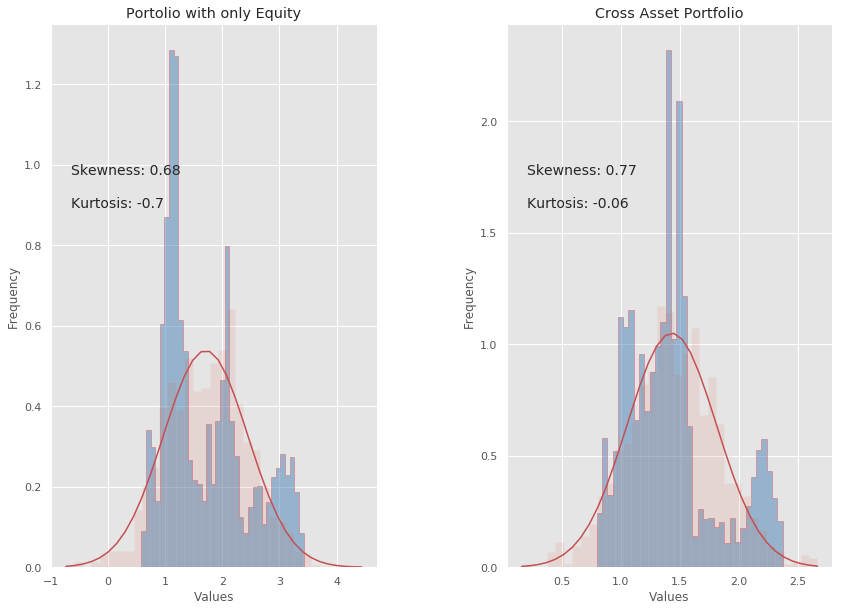

In [46]:
binsnumber = 35

fig7, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(121)
ax = plt.gca()

ax.hist(normalized_series1['Equity Only'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = normalized_series1['Equity Only'].std(),normalized_series1['Equity Only'].mean() # mean and standard deviation

s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)

ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(normalized_series1['Equity Only'].skew(),2),round(normalized_series1['Equity Only'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,360),fontsize=14)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Portolio with only Equity')

plt.subplot(122)
ax1 = plt.gca()
ax1.hist(normalized_series1['Cross Asset'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = normalized_series1['Cross Asset'].std(),normalized_series1['Cross Asset'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(normalized_series1['Cross Asset'].skew(),2),round(normalized_series1['Cross Asset'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,360),fontsize=14)


ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('Cross Asset Portfolio')
plt.show();
# fig7.savefig('portfolioshistos.png',dpi=fig7.dpi)

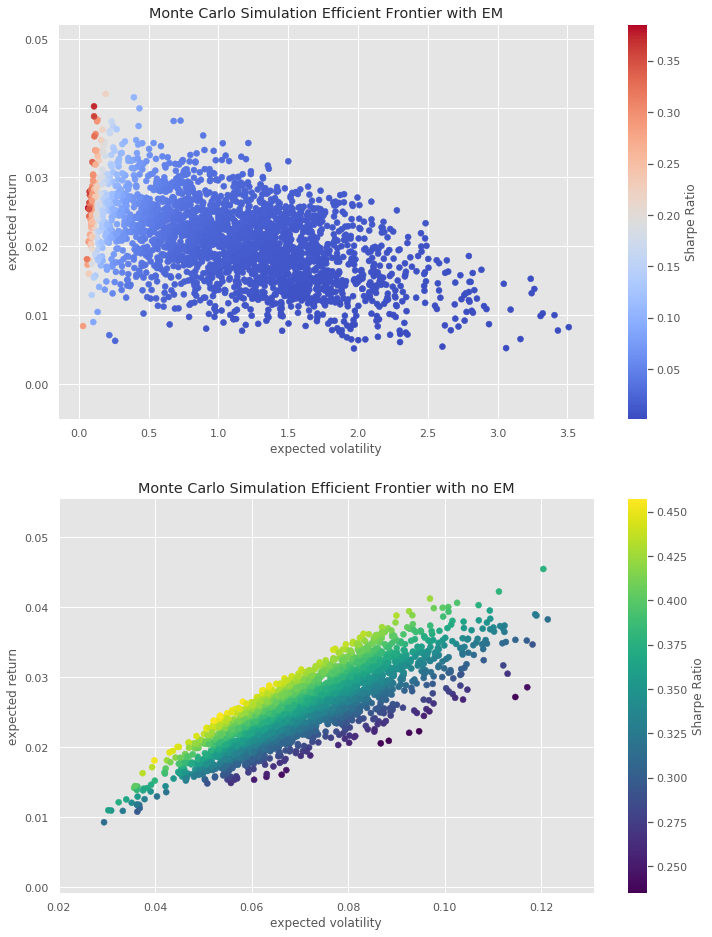

In [51]:
retEQOnly = []
volEQOnly = []

retCA = []
volCA = []

[['AGG','SPY','QQQ','OIL']]
[['AGG','SPY','QQQ','GLD']]
semana = 100
for p in range(2500):
    weights = np.random.random(len(allocation)-1)
    weights /= np.sum(weights)
    retEQOnly.append(np.sum(dataall_returns[['AGG','SPY','QQQ','OIL']].mean()* weights)* semana)
    volEQOnly.append(np.sqrt(np.dot(weights.T,np.dot(dataall_returns[['AGG','SPY','QQQ','OIL']].cov()*semana,
                                                             weights))))
retEQOnly = np.array(retEQOnly)
volEQOnly = np.array(volEQOnly)

for p in range(2500):
    weights = np.random.random(len(allocation)-1)
    weights /= np.sum(weights)
    retCA.append(np.sum(dataall_returns[['AGG','SPY','QQQ','GLD']].mean()* weights)* semana)
    volCA.append(np.sqrt(np.dot(weights.T,np.dot(dataall_returns[['AGG','SPY','QQQ','GLD']].cov()*semana,
                                                             weights))))
retCA = np.array(retCA)
volCA = np.array(volCA)

# the charts

fig8 = plt.figure(figsize = (12,16))
plt.subplots_adjust(wspace=.5)
plt.subplot(211)

plt.scatter(volEQOnly, retEQOnly, c = retEQOnly / volEQOnly, marker = 'o',cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier with EM')

plt.subplot(212)

plt.scatter(volCA, retCA, c = retCA / volCA, marker = 'o',cmap='viridis')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier with no EM')

plt.show();
# fig8.savefig('frontiers.png',dpi=fig8.dpi)